# BERT

In [138]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch     
import pandas as pd
import evaluate
metric = evaluate.load("accuracy")

In [139]:
model = "../classifier/models/bert_finetuned"
tokenizer = AutoTokenizer.from_pretrained(model, return_tensor="pt")
model = AutoModelForSequenceClassification.from_pretrained(model)

device = "cuda:0" if torch.cuda.is_available() else "cpu"

model = model.to(device)

In [140]:
save_path = "../datafiles/generated output/bnc_all.csv"
df = pd.read_csv(save_path)

In [141]:
df

,preprocessed_text,label
0,you not have keep guess. it bluff yeah. but yo...,1
1,yeah those true. that we would drink together ...,1
2,these wine. it like mm naked wines places. wel...,1
3,used do an malbec i think. they do do any. the...,1
4,i barely lift one. sizes one. this.,1
...,...,...
358,give me the most tool shaped packet. I'm gonna...,0
359,this is blatantly socks. I'm going with this o...,0
360,yeah coming. I feel like this table's kind of ...,0
361,that's really good. can I get in line. so you ...,0


In [142]:
import re
lens = [len(re.findall("[a-zA-Z_]+", x)) for x in df["preprocessed_text"]]
min(lens)

6

In [143]:
# df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=427)).sample(frac=1).reset_index(drop=True)
sentences = df["preprocessed_text"]
# sentences = df["modified"]
labels = df["label"]

In [144]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [145]:
pd.Series(labels).value_counts()

label
0    262
1    101
Name: count, dtype: int64

In [146]:
pred_labels_bert = []
true_labels = []

for sentence, label in zip(sentences, labels):
    if sentence is not None and isinstance(sentence, str):
        
        inputs = tokenizer(sentence, return_tensors="pt", truncation=True).input_ids.to(device) 
        true_labels.append(label)
        with torch.no_grad():
            logits = model(inputs).logits
        predicted_class_id = logits.argmax().item()
        pred_labels_bert.append(predicted_class_id)

In [147]:
# df["predicted"] = pred_labels_bert

In [148]:
# df = df[df["label"]==df["predicted"]]

In [149]:
# df.to_csv("../linguistic_model/data/test_merge_new.csv")

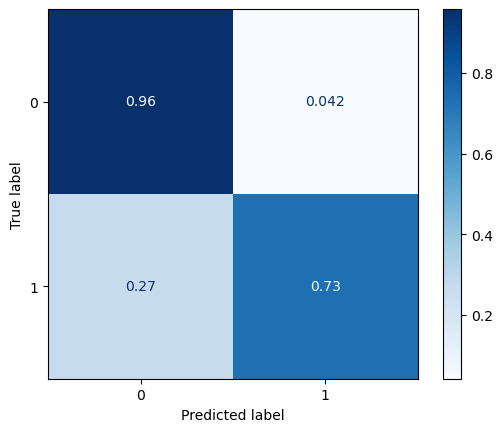

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels_bert, normalize='true')
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay.from_predictions(true_labels, pred_labels_bert, normalize="true", cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [151]:
# print(f"BERT Accuracy: {metric.compute(predictions=pred_labels_bert, references=true_labels)}")

In [152]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (2 * precision * recall)/ (precision+recall)
print("accuracy: ", metric.compute(predictions=pred_labels_bert, references=true_labels)["accuracy"])
print("precision: ", precision) 
print("recall: ", recall)
print("f1: ", f1)

accuracy:  0.8953168044077136
precision:  0.9458022342553295
recall:  0.7326732673267327
f1:  0.8257064372564468


# Visualize attention

In [153]:
# from bertviz import model_view, head_view
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
# import torch
# 
# tokenizer = AutoTokenizer.from_pretrained("models/bert_finetuned_reverse", return_tensor="pt")
# model = AutoModel.from_pretrained("models/bert_finetuned_reverse")
# device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [154]:
# print(sentences[10], labels[10])

In [155]:
# sentence = '"those are that an slashes is watching, right?"'
# label = "1"
# input = tokenizer.encode(sentence, return_tensors="pt")
# output = model(input, output_attentions=True)
# 
# attention = output[-1]
# tokens = tokenizer.convert_ids_to_tokens(input[0]) 
# model_view(attention, tokens)
# print(sentence, label)

# KNN 

In [156]:
# from gensim.models import Word2Vec
# import numpy as np
# import pickle

In [157]:
# w2v_model = Word2Vec.load("models/word2vec_knn_reverse.model")
# vocab=list(w2v_model.wv.key_to_index.keys())
# loaded_model = pickle.load(open('models/knn_reverse_pickle', 'rb'))

In [158]:
# def avg_w2vec(sentences, labels):
#     """
#     Average Word2Vec approach for creating a vector for a given sentence from the word embeddings of each words of the sentence.
#     """
# 
#     transformed=[]
#     lab = []
#     for sentence, label in zip(sentences,labels):
#         count=0
#         vector=np.zeros(300)
#         for word in sentence.split():
#             if word in vocab:
#                 vector+=w2v_model.wv.get_vector(word)
#                 count+=1
#         if count!=0:
#             vector/=count
#             transformed.append(vector)
#             lab.append(label)
#     return np.array(transformed), np.array(lab)

In [159]:
# transformed_text, labels1= avg_w2vec(sentences, labels)

In [160]:
# pred_labels_knn = loaded_model.predict(transformed_text)

In [161]:
# print(len(pred_labels_knn))
# print(len(transformed_text))

In [162]:
# print(f"KNN Accuracy: {metric.compute(predictions=pred_labels_knn, references=labels1)}")

In [163]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# 
# cm = confusion_matrix(labels1, pred_labels_knn, normalize='true')
# tn, fp, fn, tp = cm.ravel()
# ConfusionMatrixDisplay.from_predictions(labels1, pred_labels_knn, normalize="true", cmap=plt.cm.Blues)
# plt.grid(False)
# plt.show()

In [164]:
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1 = (2 * precision * recall)/ (precision+recall)
# print(precision) 
# print(recall)
# print(f1)

# Random forest

In [165]:
# from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

In [166]:
# w2v_model = Word2Vec.load("models/word2vec_rf_reverse.model")
# vocab=list(w2v_model.wv.key_to_index.keys())

In [167]:
# loaded_model = pickle.load(open('models/rf_reverse_pickle', 'rb'))

In [168]:
# pred_labels_rf = loaded_model.predict(transformed_text)

In [169]:
# print(f"RF Accuracy: {metric.compute(predictions=pred_labels_rf, references=labels1)}")

In [170]:
# cm = confusion_matrix(labels1, pred_labels_rf, normalize='true')
# tn, fp, fn, tp = cm.ravel()
# ConfusionMatrixDisplay.from_predictions(labels1, pred_labels_rf, normalize="true", cmap=plt.cm.Blues)
# plt.grid(False)
# plt.show()

In [171]:
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1 = (2 * precision * recall)/ (precision+recall)
# print(precision) 
# print(recall)
# print(f1)